In [32]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from matplotlib import pyplot as plt 
import seaborn as sns
from scipy.interpolate import make_interp_spline

In [2]:
df = pd.read_csv('./auto-mpg.csv')
df = df.replace('?',0)

In [3]:
knn = KNNImputer(missing_values=0, n_neighbors=5)
df.horsepower = knn.fit_transform(df.horsepower.values.reshape(-1,1))

In [4]:
mean_df = df.groupby('model year').mean().reset_index()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15192\2941561499.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_df = df.groupby('model year').mean().reset_index()


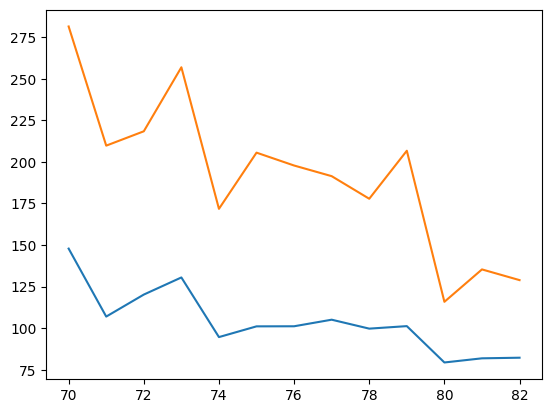

In [7]:
plt.plot(mean_df['model year'].values,mean_df.horsepower.values)
plt.plot(mean_df['model year'].values,mean_df.displacement.values)

In [37]:
B_spline_coeff = make_interp_spline(mean_df['model year'].values, mean_df.horsepower.values)
X_Final = np.linspace(mean_df['model year'].values.min(), mean_df['model year'].values.max(), 500)
Y_horse = B_spline_coeff(X_Final)

B_spline_coeff = make_interp_spline(mean_df['model year'].values, mean_df.displacement.values)
Y_displacement = B_spline_coeff(X_Final)

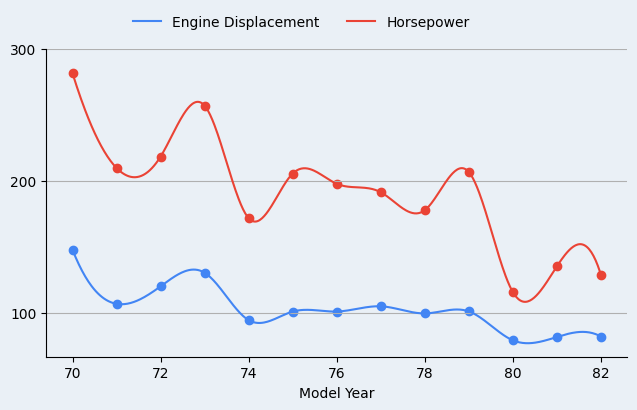

In [88]:
plt.rcParams['figure.figsize'] = (7.5,4)
fig, ax = plt.subplots()
fig.set_facecolor('#eaf0f6')
ax.spines[['top','right']].set_visible(False)
ax.set_facecolor('#eaf0f6')
ax.grid(axis='y')
ax.plot(X_Final,Y_horse,color='#4285F4',label='Engine Displacement')
ax.plot(X_Final,Y_displacement,color='#ea4335',label='Horsepower')
ax.scatter(mean_df['model year'].values,mean_df.horsepower.values,color='#4285F4')
ax.scatter(mean_df['model year'].values,mean_df.displacement.values,color='#ea4335')
ax.set_yticks([100,200,300])
ax.set_xlabel('Model Year')
plt.legend(bbox_to_anchor =(0.75, 1.15), ncol = 2,frameon=False,)
plt.show()